In [2]:
import pandas as pd
df = pd.read_csv("liver_cirrhosis.csv")
df.head()



,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [11]:
df.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [12]:
binary_map = {'N': 0, 'Y': 1}
df['Ascites'] = df['Ascites'].map(binary_map)
df['Hepatomegaly'] = df['Hepatomegaly'].map(binary_map)
df['Spiders'] = df['Spiders'].map(binary_map)

In [15]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
le_drug = LabelEncoder()
le_status = LabelEncoder()
le_edema = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])
df['Drug'] = le_drug.fit_transform(df['Drug'])
df['Status'] = le_status.fit_transform(df['Status'])
df['Edema'] = le_edema.fit_transform(df['Edema'])


In [16]:
df['Age'] = df['Age'] // 365

In [17]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,0,1,50,0,0,1,0,0,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,0,1,54,1,1,0,1,0,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,0,1,32,0,0,0,0,0,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,2,1,45,0,0,0,0,0,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,2,1,59,0,0,1,0,0,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [18]:
df['Stage'].unique()

array([1, 2, 3])

In [19]:
df.shape

(25000, 19)

C:\Users\akalo\AppData\Local\Temp\ipykernel_18488\110351078.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Stage', data=df, palette='Set2')


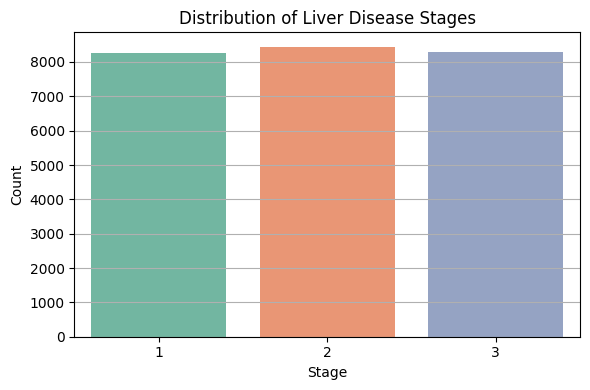

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(x='Stage', data=df, palette='Set2')
plt.title('Distribution of Liver Disease Stages')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\akalo\AppData\Local\Temp\ipykernel_18488\4220685007.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='pastel')


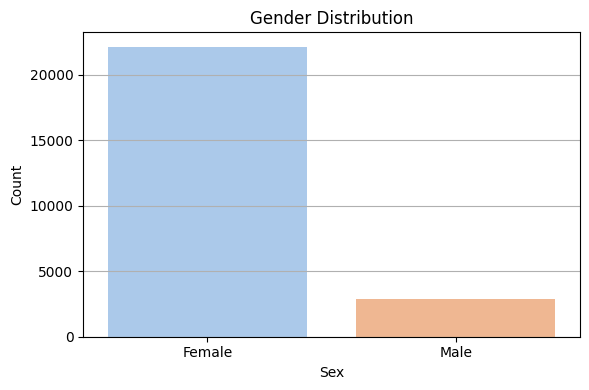

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xticks(ticks=[0,1], labels=["Female", "Male"])
plt.ylabel("Count")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

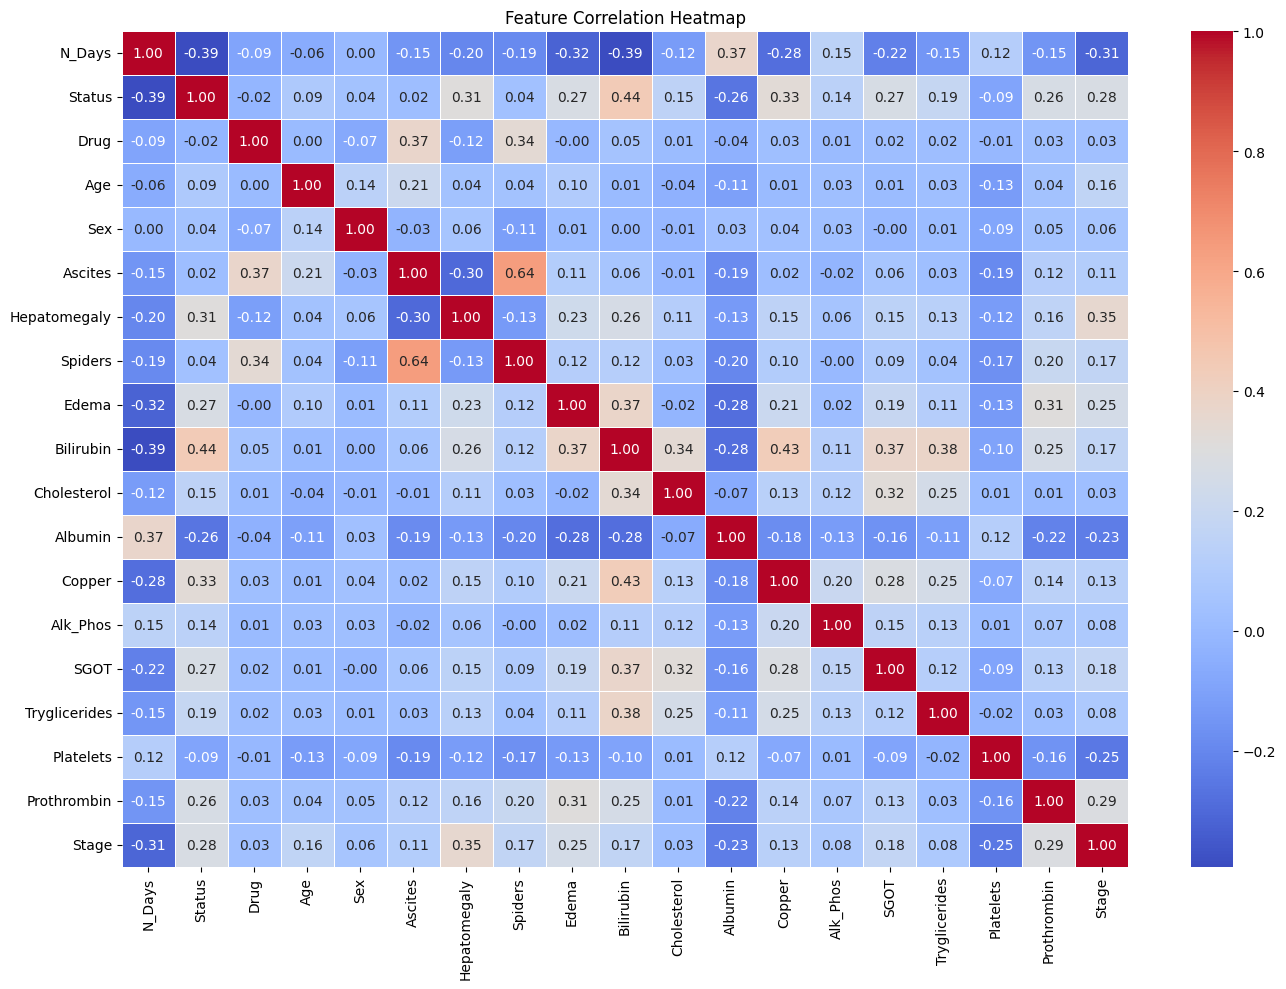

In [23]:
plt.figure(figsize=(14, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

In [24]:
numerical_cols = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

C:\Users\akalo\AppData\Local\Temp\ipykernel_18488\398651327.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stage', y=col, data=df, palette='Set3')


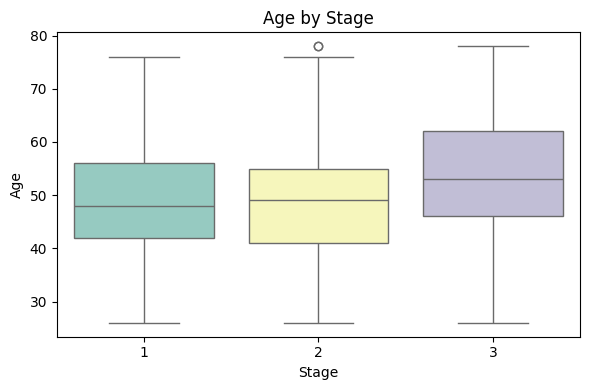

C:\Users\akalo\AppData\Local\Temp\ipykernel_18488\398651327.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stage', y=col, data=df, palette='Set3')


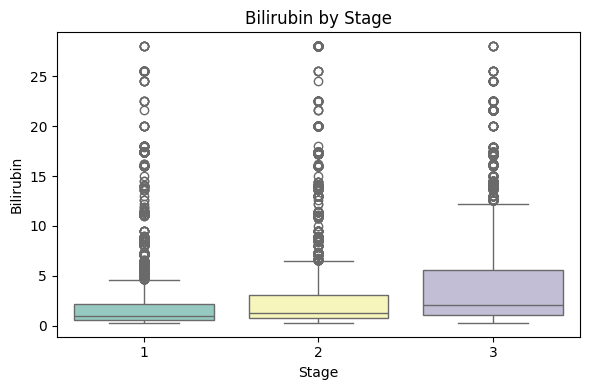

C:\Users\akalo\AppData\Local\Temp\ipykernel_18488\398651327.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stage', y=col, data=df, palette='Set3')


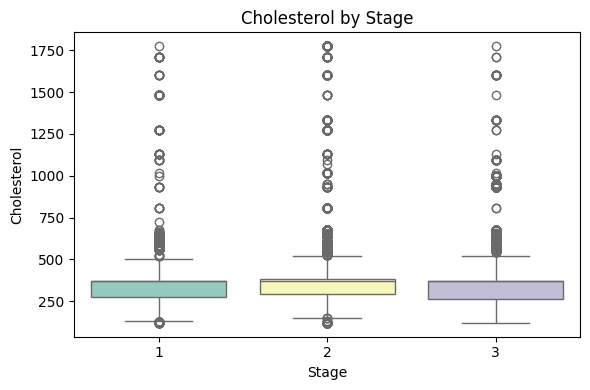

C:\Users\akalo\AppData\Local\Temp\ipykernel_18488\398651327.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stage', y=col, data=df, palette='Set3')


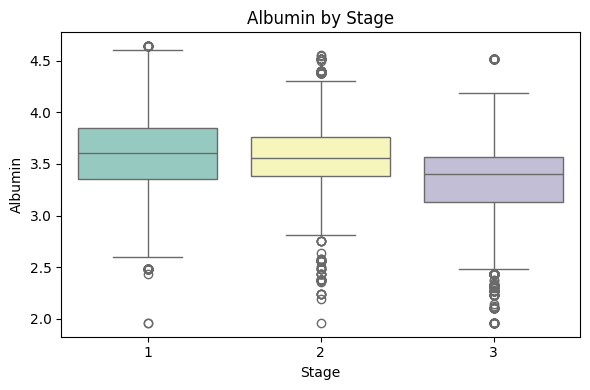

C:\Users\akalo\AppData\Local\Temp\ipykernel_18488\398651327.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stage', y=col, data=df, palette='Set3')


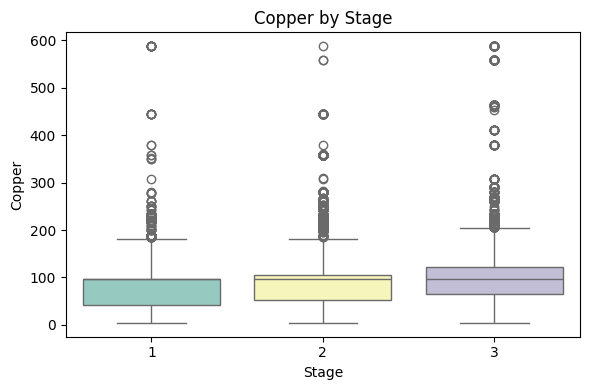

C:\Users\akalo\AppData\Local\Temp\ipykernel_18488\398651327.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stage', y=col, data=df, palette='Set3')


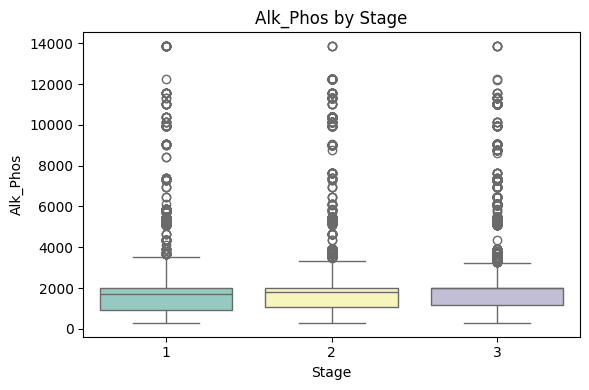

C:\Users\akalo\AppData\Local\Temp\ipykernel_18488\398651327.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stage', y=col, data=df, palette='Set3')


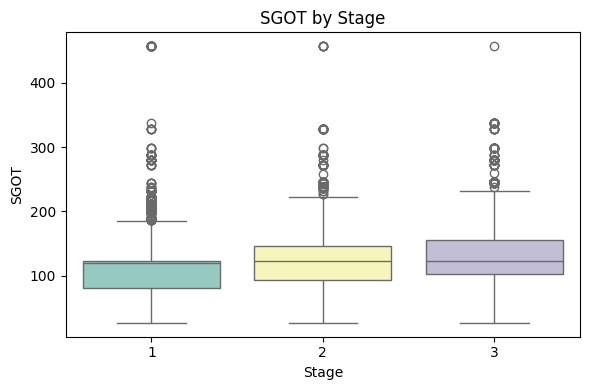

C:\Users\akalo\AppData\Local\Temp\ipykernel_18488\398651327.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stage', y=col, data=df, palette='Set3')


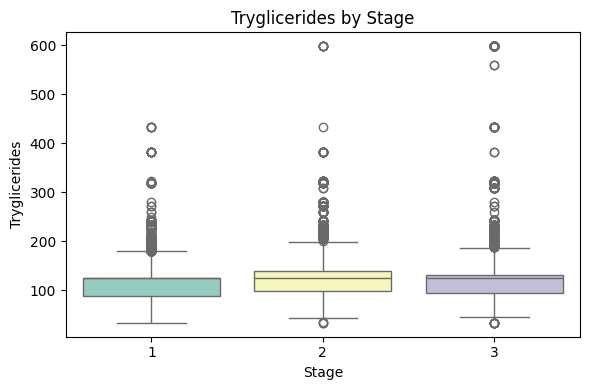

C:\Users\akalo\AppData\Local\Temp\ipykernel_18488\398651327.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stage', y=col, data=df, palette='Set3')


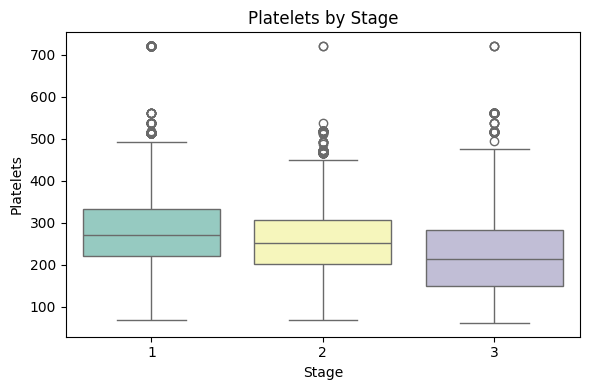

C:\Users\akalo\AppData\Local\Temp\ipykernel_18488\398651327.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stage', y=col, data=df, palette='Set3')


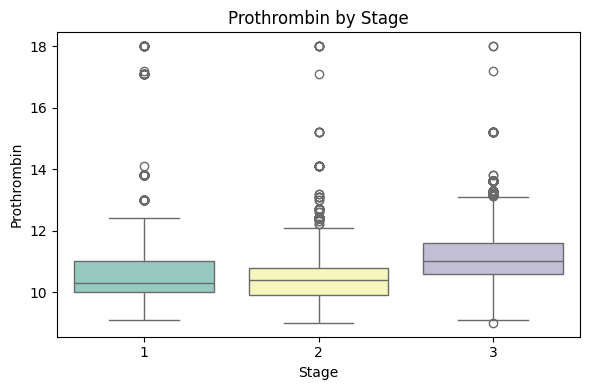

In [25]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Stage', y=col, data=df, palette='Set3')
    plt.title(f'{col} by Stage')
    plt.tight_layout()
    plt.show()

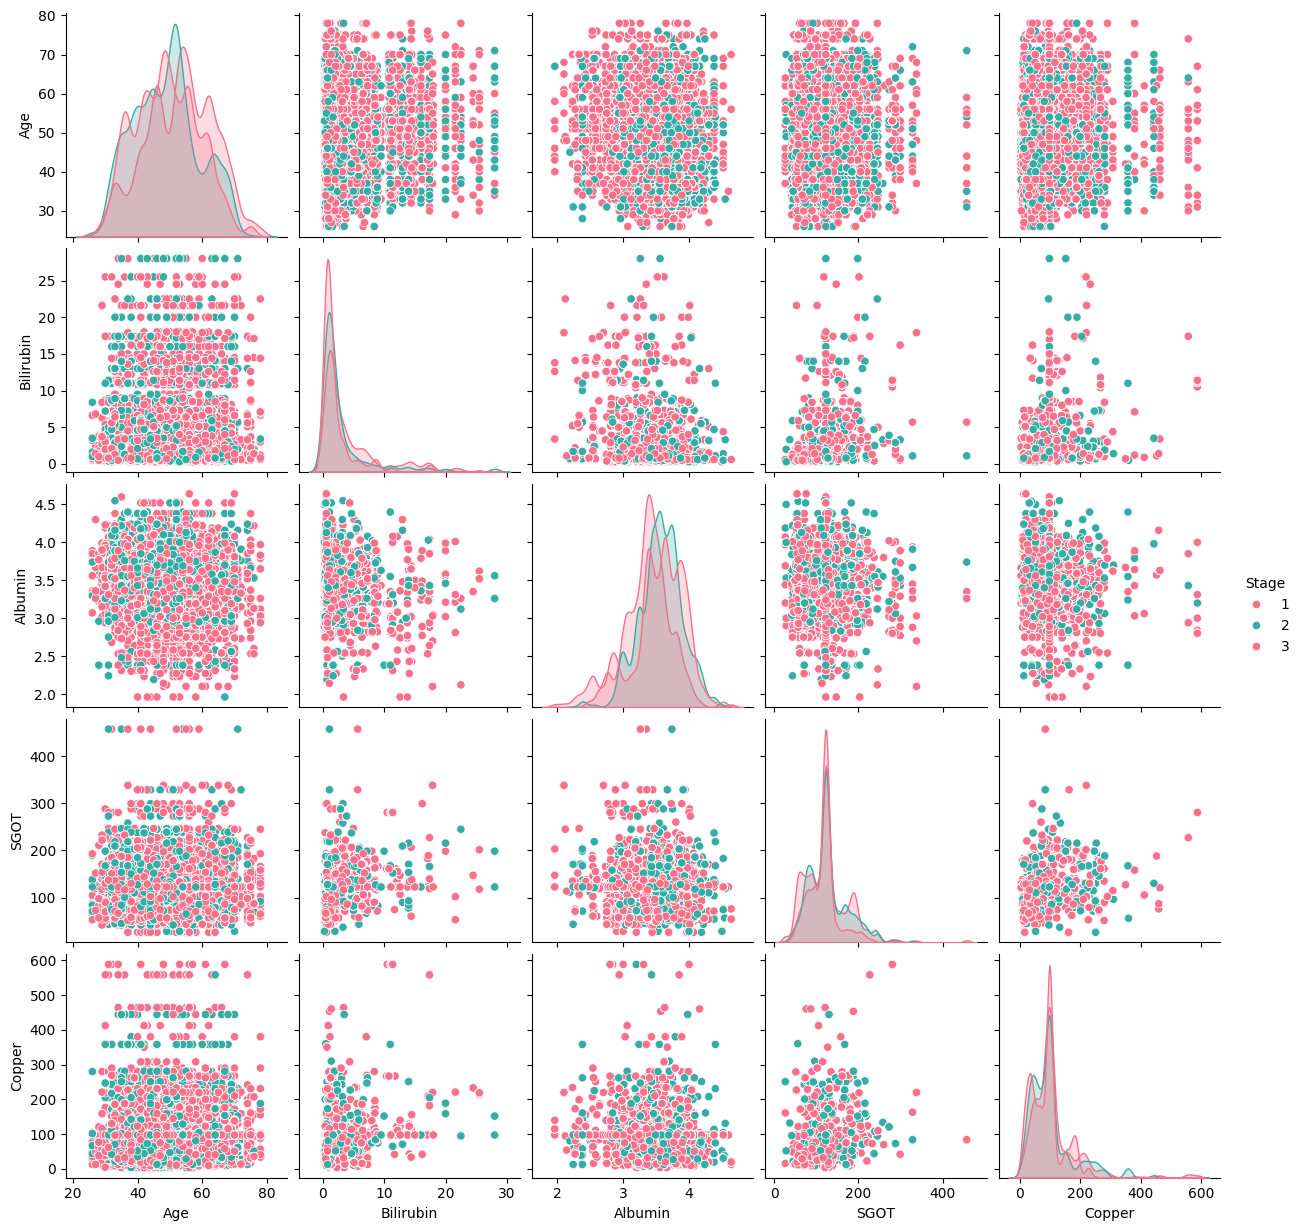

In [27]:
sns.pairplot(df[['Stage', 'Age', 'Bilirubin', 'Albumin', 'SGOT', 'Copper']], hue='Stage', palette='husl')
plt.show()

C:\Users\akalo\AppData\Local\Temp\ipykernel_18488\2157842552.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='cool')


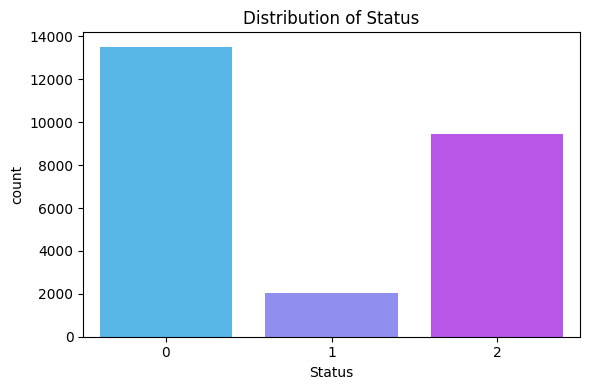

C:\Users\akalo\AppData\Local\Temp\ipykernel_18488\2157842552.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='cool')


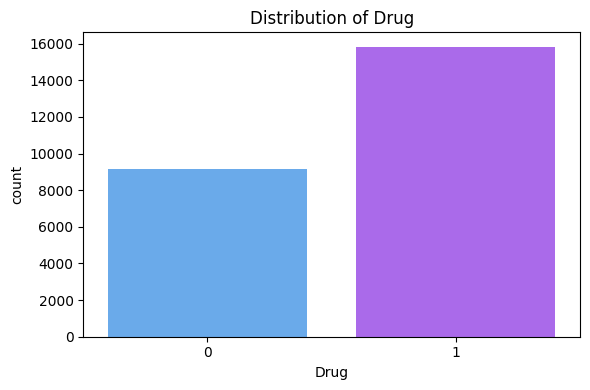

C:\Users\akalo\AppData\Local\Temp\ipykernel_18488\2157842552.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='cool')


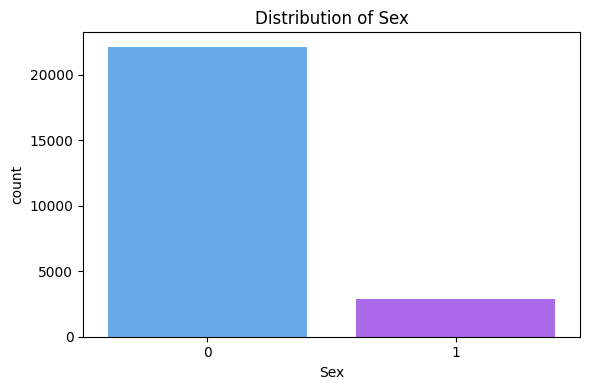

C:\Users\akalo\AppData\Local\Temp\ipykernel_18488\2157842552.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='cool')


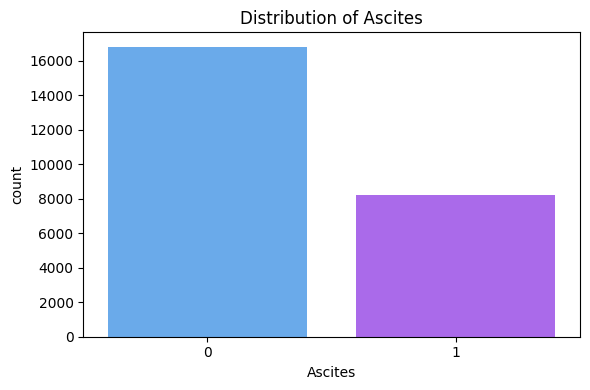

C:\Users\akalo\AppData\Local\Temp\ipykernel_18488\2157842552.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='cool')


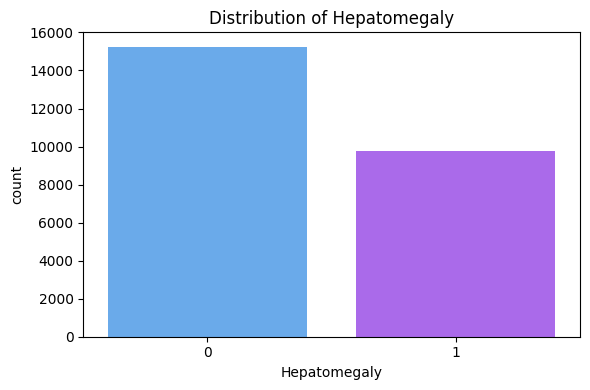

C:\Users\akalo\AppData\Local\Temp\ipykernel_18488\2157842552.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='cool')


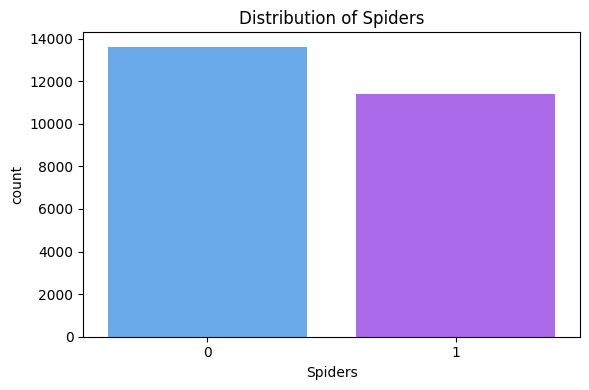

C:\Users\akalo\AppData\Local\Temp\ipykernel_18488\2157842552.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='cool')


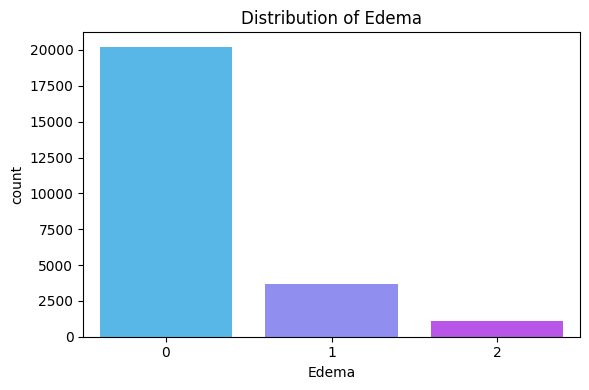

In [28]:
categorical_cols = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, palette='cool')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
X = df.drop(columns=['Stage']) 
y = df['Stage']                 


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
   
}

In [ ]:
y = df['Stage'] - 1  # Convert [1, 2, 3] → [0, 1, 2]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    
    y_pred_raw = model.predict(X_test_scaled)       
    y_pred = y_pred_raw + 1                         
    y_true = y_test + 1                            

    print(f"\n🔍 Model: {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))


🔍 Model: Random Forest
Accuracy: 0.952
Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.93      0.95      1653
           2       0.93      0.96      0.94      1688
           3       0.97      0.97      0.97      1659

    accuracy                           0.95      5000
   macro avg       0.95      0.95      0.95      5000
weighted avg       0.95      0.95      0.95      5000



c:\Users\akalo\Downloads\Projects-20240722T093004Z-001\Projects\liver_cirrhosis_stage\liver_cirrhosis_stage\liver-env\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:47:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔍 Model: XGBoost
Accuracy: 0.9608
Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.95      0.96      1653
           2       0.95      0.96      0.95      1688
           3       0.97      0.97      0.97      1659

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000




🔍 Evaluating Model: Random Forest
Accuracy: 0.9520
Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.93      0.95      1653
           2       0.93      0.96      0.94      1688
           3       0.97      0.97      0.97      1659

    accuracy                           0.95      5000
   macro avg       0.95      0.95      0.95      5000
weighted avg       0.95      0.95      0.95      5000



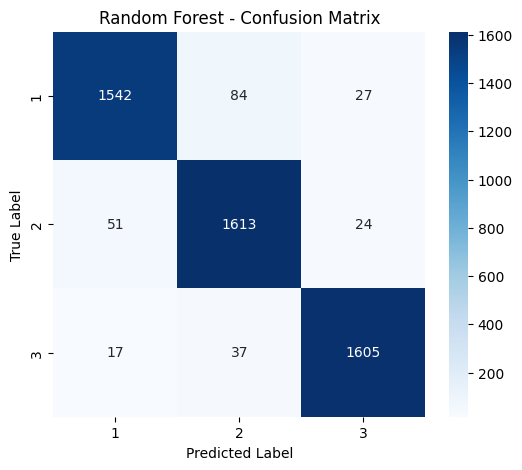

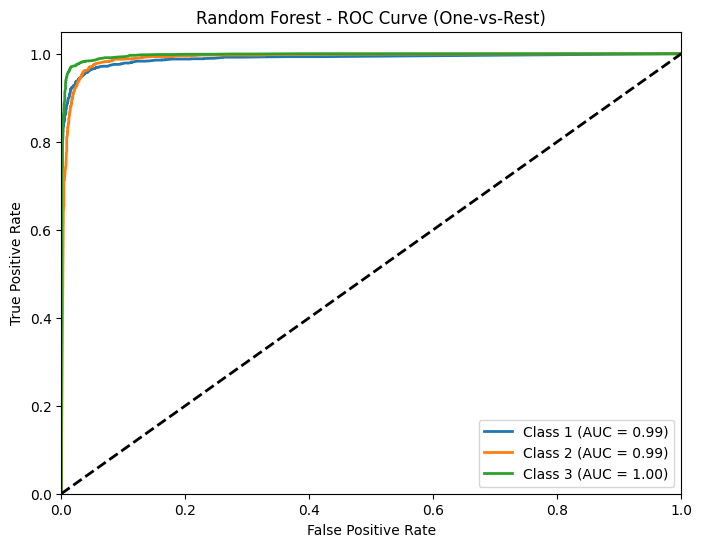

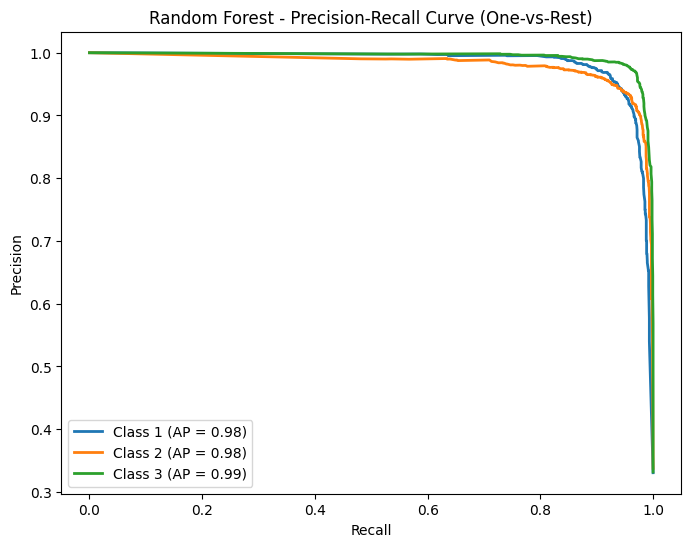


🔍 Evaluating Model: XGBoost
Accuracy: 0.9608
Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.95      0.96      1653
           2       0.95      0.96      0.95      1688
           3       0.97      0.97      0.97      1659

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



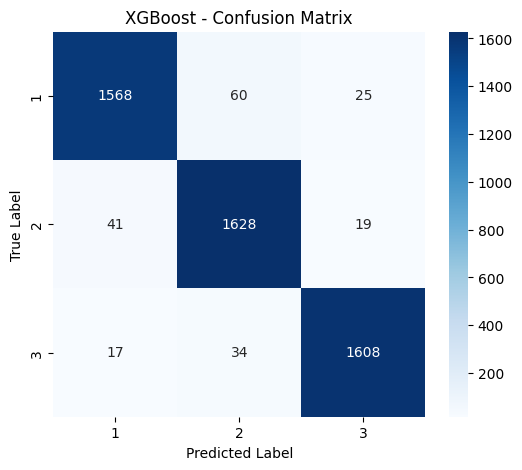

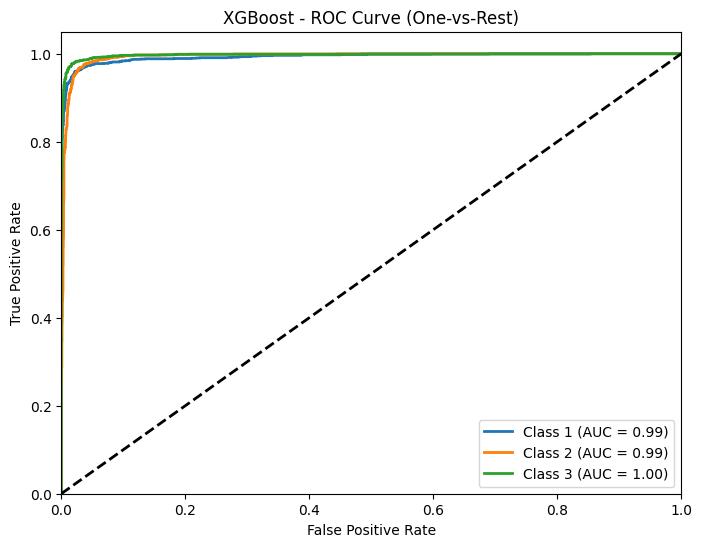

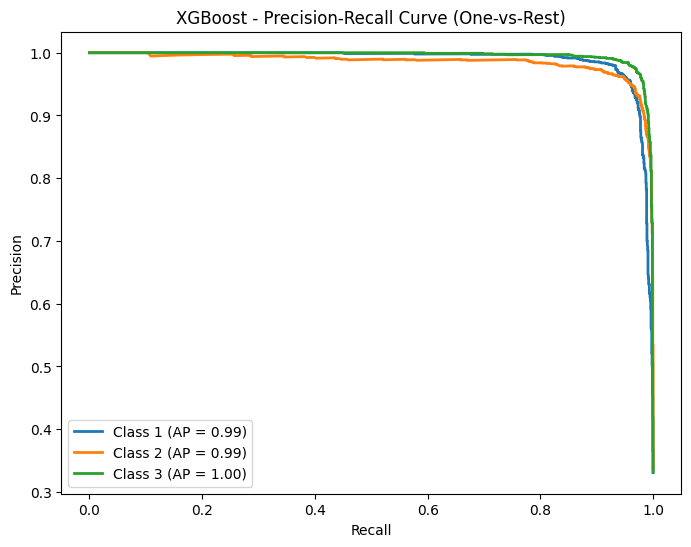

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score
)
from sklearn.preprocessing import label_binarize


class_names = [1, 2, 3]
n_classes = len(class_names)


def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()


def plot_roc(y_test_bin, y_score, model_name):
    plt.figure(figsize=(8,6))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], lw=2,
                 label=f'Class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve (One-vs-Rest)')
    plt.legend(loc="lower right")
    plt.show()


def plot_precision_recall(y_test_bin, y_score, model_name):
    plt.figure(figsize=(8,6))
    precision = dict()
    recall = dict()
    average_precision = dict()

    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])
        plt.plot(recall[i], precision[i], lw=2,
                 label=f'Class {class_names[i]} (AP = {average_precision[i]:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model_name} - Precision-Recall Curve (One-vs-Rest)')
    plt.legend(loc="lower left")
    plt.show()


for name, model in models.items():
    print(f"\n🔍 Evaluating Model: {name}")
    y_pred_raw = model.predict(X_test_scaled)
    y_pred = y_pred_raw + 1   
    y_true = y_test + 1      
    acc = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {acc:.4f}")
    
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=[str(c) for c in class_names]))
    cm = confusion_matrix(y_true, y_pred, labels=class_names)
    plot_confusion_matrix(cm, name)
    
   
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_scaled)
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test_scaled)
       
    else:
        print(f"⚠️ Model {name} does not support probability scores, skipping ROC and PR curves.")
        continue
    
 
    y_test_bin = label_binarize(y_test, classes=[0,1,2])
    
 
    plot_roc(y_test_bin, y_score, name)
    
   
    plot_precision_recall(y_test_bin, y_score, name)


🔍 Showing SHAP for Class 1


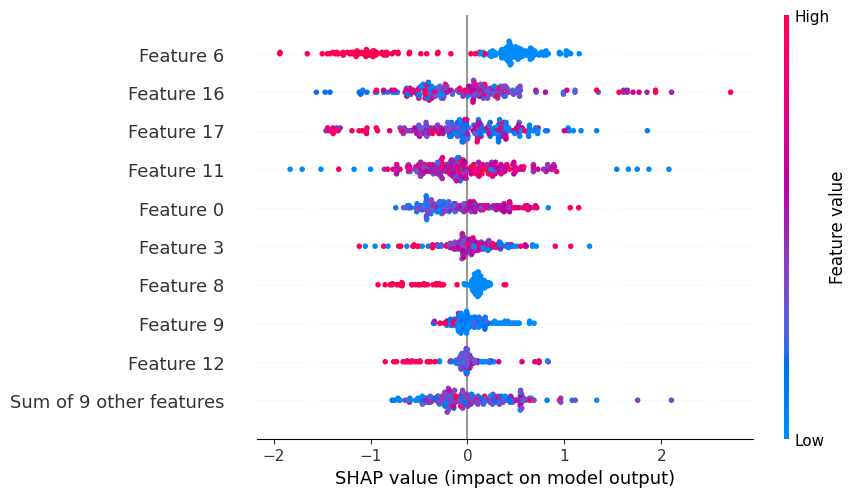

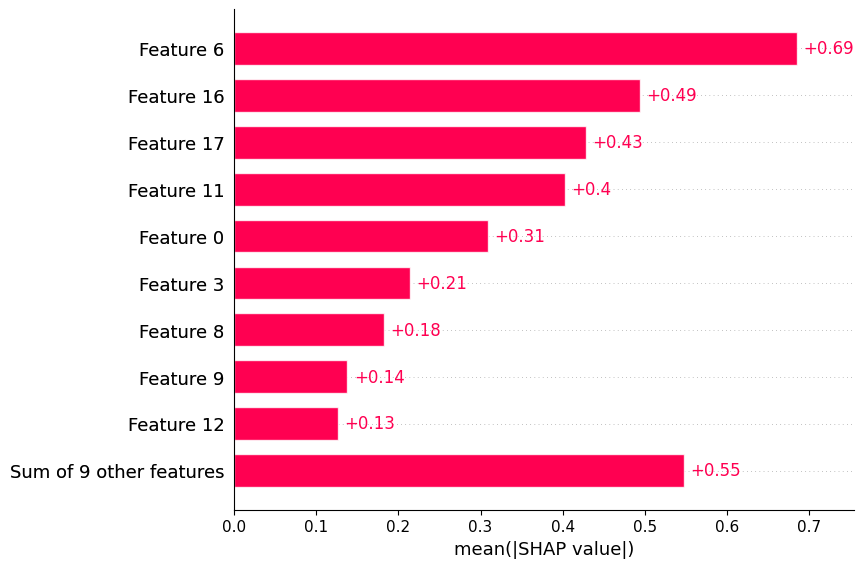

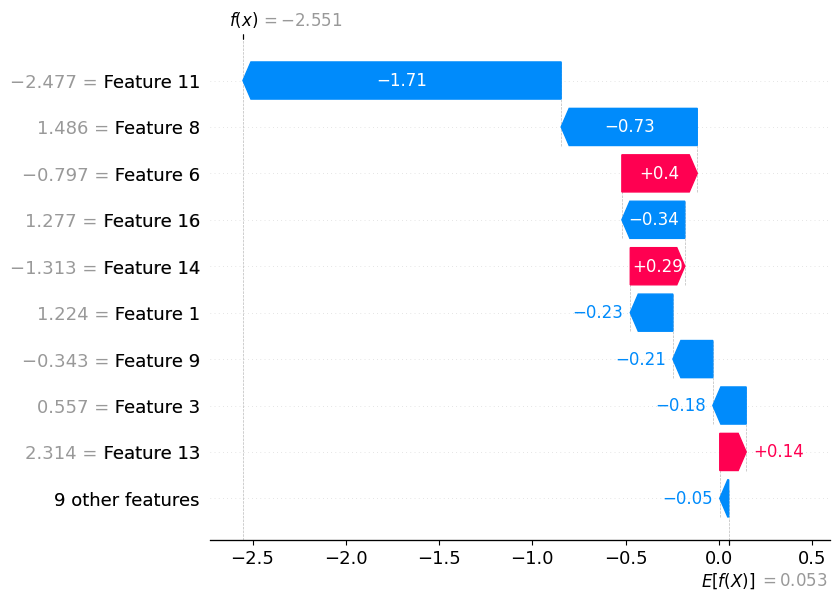

In [ ]:
import shap


xgb_model = models['XGBoost']


explainer = shap.Explainer(xgb_model, X_train_scaled)


shap_values = explainer(X_test_scaled[:200]) 

class_index = 0 
print(f"🔍 Showing SHAP for Class {class_index + 1}")
shap.plots.beeswarm(shap_values[:, :, class_index])


shap.plots.bar(shap_values[:, :, class_index])


sample_index = 5
shap.plots.waterfall(shap_values[sample_index, :, class_index])




 SHAP for Class 1


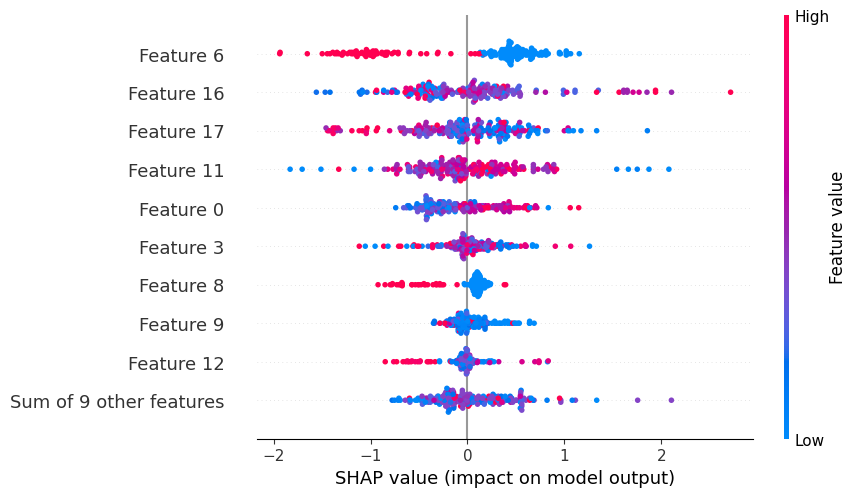


 SHAP for Class 2


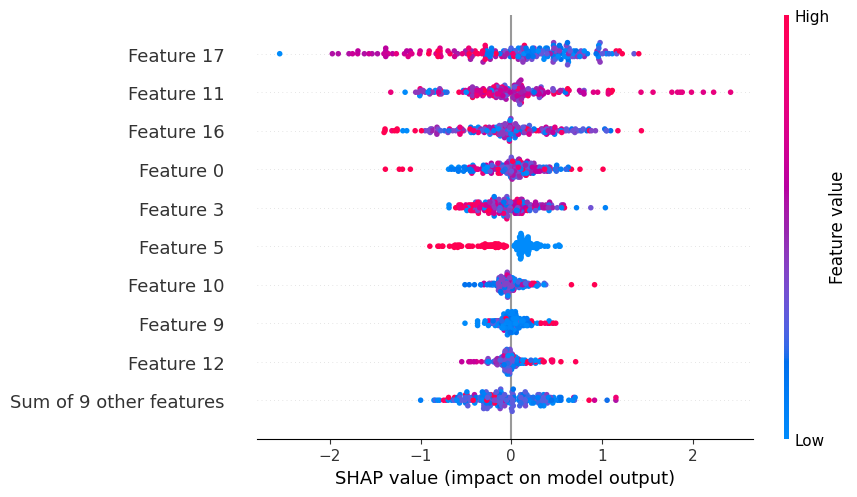


 SHAP for Class 3


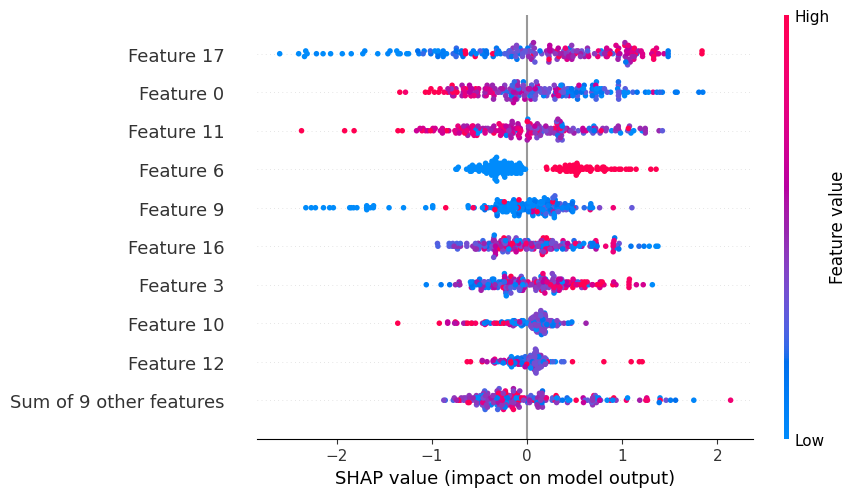

In [48]:
for class_index in range(3):
    print(f"\n SHAP for Class {class_index + 1}")
    shap.plots.beeswarm(shap_values[:, :, class_index])


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


y_train_tune = y_train  


param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}


xgb = XGBClassifier(objective='multi:softprob', num_class=3, eval_metric='mlogloss', use_label_encoder=False)


grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train_scaled, y_train_tune)


print("Best Parameters:", grid_search.best_params_)


print("Best CV Accuracy:", grid_search.best_score_)


best_xgb_model = grid_search.best_estimator_


y_pred_best = best_xgb_model.predict(X_test_scaled)
y_pred_best_stage = y_pred_best + 1
y_test_stage = y_test + 1

print("Accuracy:", accuracy_score(y_test_stage, y_pred_best_stage))
print("Classification Report:\n", classification_report(y_test_stage, y_pred_best_stage))


Fitting 3 folds for each of 48 candidates, totalling 144 fits


c:\Users\akalo\Downloads\Projects-20240722T093004Z-001\Projects\liver_cirrhosis_stage\liver_cirrhosis_stage\liver-env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:05:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Best CV Accuracy: 0.9532501022713641
Accuracy: 0.9558
Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.94      0.95      1653
           2       0.94      0.96      0.95      1688
           3       0.97      0.96      0.97      1659

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



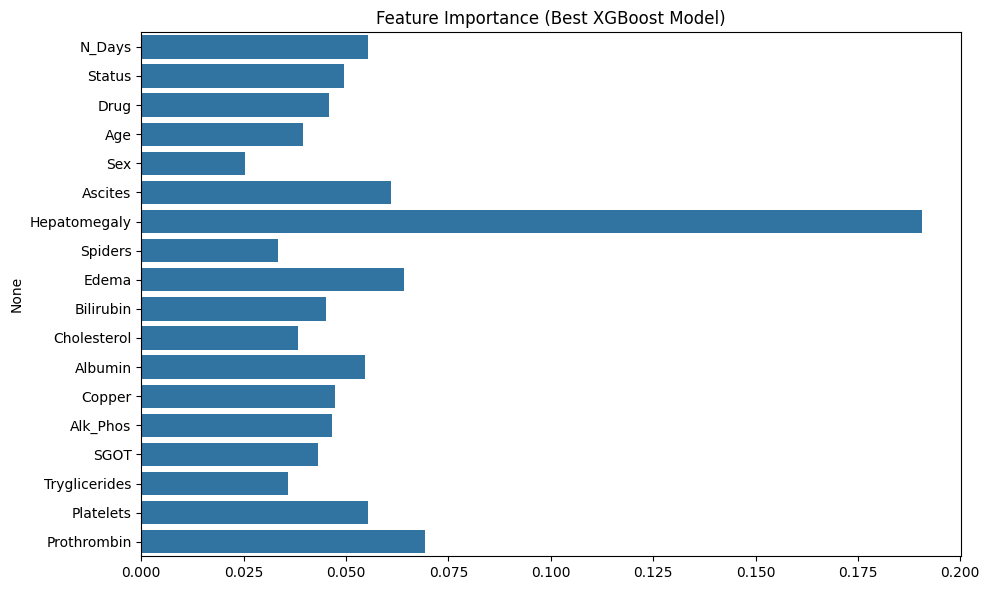

In [ ]:
import matplotlib.pyplot as plt
importances = best_xgb_model.feature_importances_
feature_names = X.columns


plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Best XGBoost Model)")
plt.tight_layout()
plt.show()


In [ ]:
import joblib
joblib.dump(best_xgb_model, 'liver_cirrhosis_xgboost_model.pkl')


['liver_cirrhosis_xgboost_model.pkl']

In [52]:
import joblib
joblib.dump(best_xgb_model, 'best_xgboost_model.pkl')


['best_xgboost_model.pkl']